```
Problem Statement:
"Understanding Cryptocurrency Price Dynamics and Developing Profitable Trading Strategies Using Data-Driven Insights"

Context: The cryptocurrency market is influenced by a variety of factors, including trading volume, leverage ratios, market sentiment, and on-chain metrics. Understanding these factors is critical for predicting price movements, designing trading strategies, and ensuring profitable decision-making in volatile market conditions.
```

In [1]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Display plots inline
%matplotlib inline


In [2]:
# Step 2: Load the dataset
df = pd.read_csv('UM_datathon_2024.csv')

# Display basic information about the dataset
print(df.info())

# Display the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41498 entries, 0 to 41497
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   time                                  41498 non-null  object 
 1   difficulty                            41363 non-null  float64
 2   estimated_leverage_ratio              41498 non-null  float64
 3   addresses_count_active                41498 non-null  int64  
 4   addresses_count_sender                41498 non-null  int64  
 5   addresses_count_receiver              41498 non-null  int64  
 6   exchange_whale_ratio                  41498 non-null  float64
 7   coinbase_premium_gap                  41466 non-null  float64
 8   coinbase_premium_index                41466 non-null  float64
 9   coinbase_premium_gap_usdt_adjusted    41466 non-null  float64
 10  coinbase_premium_index_usdt_adjusted  41466 non-null  float64
 11  taker_buy_volum

,time,difficulty,estimated_leverage_ratio,addresses_count_active,addresses_count_sender,addresses_count_receiver,exchange_whale_ratio,coinbase_premium_gap,coinbase_premium_index,coinbase_premium_gap_usdt_adjusted,...,long_liquidations,short_liquidations,long_liquidations_usd,short_liquidations_usd,open_price,high_price,low_price,close_price,volume,open_interest
0,2020-03-25 10:00:00,1.655292e+13,0.070577,30656,12888,21617,0.940847,12.50,0.189479,1.125713,...,425.717,8.770,2.831061e+06,58055.69835,6500.0,6591.5,6500.0,6591.5,0.004,1.198203e+08
1,2020-03-25 11:00:00,1.655292e+13,0.071966,21379,8467,14875,0.885981,18.64,0.285830,2.369076,...,385.434,21.699,2.499324e+06,142518.22527,6591.5,6628.5,6457.5,6511.5,438.873,1.211306e+08
2,2020-03-25 12:00:00,1.655292e+13,0.072686,29164,13292,19201,0.884669,17.17,0.260595,7.388429,...,6.060,35.155,3.950575e+04,230609.80208,6511.5,6588.5,6502.0,6583.5,529.318,1.236765e+08
3,2020-03-25 13:00:00,NaN,0.070549,0,0,0,0.000000,16.12,0.245213,4.339870,...,106.667,134.954,7.070354e+05,898106.41361,6583.5,6745.5,6562.0,6585.0,449.162,1.197917e+08
4,2020-03-25 14:00:00,1.655292e+13,0.071959,25234,10221,18363,0.867330,14.46,0.218125,-2.762051,...,124.720,52.400,8.154464e+05,347108.26236,6585.0,6640.0,6516.0,6590.0,258.831,1.228579e+08


In [3]:
# Step 3.1: Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])


### Handling Missing Values

In [4]:

df.ffill(inplace=True)  # Forward fill
df.bfill(inplace=True)  # Backward fill

# Verify no missing values remain
print(df.isnull().sum().sum())


0


## EDA (Explanatory Data Analysis)

In [54]:
# Generate summary statistics for numerical columns
summary_statistics = df.describe()

# Display the summary statistics
print(summary_statistics)
summary_statistics

                      time    difficulty  estimated_leverage_ratio  \
count                41498  4.149800e+04              41498.000000   
mean   2022-08-06 22:30:00  4.205203e+13                  0.182852   
min    2020-03-25 10:00:00  1.367259e+13                  0.069790   
25%    2021-05-31 16:15:00  2.060742e+13                  0.147567   
50%    2022-08-06 22:30:00  3.028329e+13                  0.176065   
75%    2023-10-13 04:45:00  5.732151e+13                  0.211900   
max    2024-12-18 11:00:00  1.085226e+14                  0.359523   
std                    NaN  2.628950e+13                  0.048183   

       addresses_count_active  addresses_count_sender  \
count            41498.000000            41498.000000   
mean             52901.173069            29239.806376   
min                  0.000000                0.000000   
25%              39617.250000            20012.000000   
50%              51104.500000            27586.000000   
75%              64618.7500

,time,difficulty,estimated_leverage_ratio,addresses_count_active,addresses_count_sender,addresses_count_receiver,exchange_whale_ratio,coinbase_premium_gap,coinbase_premium_index,coinbase_premium_gap_usdt_adjusted,...,square_close_price,close_price_lag1,close_price_lag2,signal,pnl,cumulative_pnl,rolling_mean,rolling_std,z_score,predicted_close
count,41498,4.149800e+04,41498.000000,41498.000000,41498.000000,41498.000000,41498.000000,41498.000000,41498.000000,41498.000000,...,4.149800e+04,41497.000000,41496.000000,41498.000000,41497.000000,41497.000000,41475.000000,41475.000000,41475.000000,41498.000000
mean,2022-08-06 22:30:00,4.205203e+13,0.182852,52901.173069,29239.806376,28752.070582,0.871944,8.414615,0.023714,4.055462,...,1.785310e+09,37165.165335,37163.542281,0.017206,0.000073,2.364788,37156.480304,395.184674,0.068066,37166.680268
min,2020-03-25 10:00:00,1.367259e+13,0.069790,0.000000,0.000000,0.000000,0.000000,-829.900000,-3.060686,-1562.120000,...,3.449213e+07,5873.000000,5873.000000,-1.000000,-0.125000,-0.022870,6041.208333,7.538190,-4.531336,5912.648802
25%,2021-05-31 16:15:00,2.060742e+13,0.147567,39617.250000,20012.000000,20999.000000,0.830485,-3.310000,-0.011614,-6.714996,...,4.425343e+08,21036.000000,21035.875000,-1.000000,-0.002528,1.549773,21045.385417,121.531258,-0.920323,21015.675024
50%,2022-08-06 22:30:00,3.028329e+13,0.176065,51104.500000,27586.000000,27416.500000,0.889170,5.650000,0.020418,0.840663,...,1.171334e+09,34224.000000,34223.800000,1.000000,-0.000132,2.833452,34212.208333,276.723306,0.115104,34227.257130
75%,2023-10-13 04:45:00,5.732151e+13,0.211900,64618.750000,36779.000000,35257.000000,0.935914,18.550000,0.056657,8.389426,...,2.652018e+09,51494.000000,51491.750000,1.000000,0.002356,3.279782,51486.314583,542.389944,1.049944,51483.055515
max,2024-12-18 11:00:00,1.085226e+14,0.359523,162532.000000,123005.000000,100427.000000,0.999604,1381.930000,2.612461,3628.520086,...,1.172378e+10,108276.400000,108276.400000,1.000000,0.092797,3.734413,106794.891667,3526.858605,4.596158,107579.518871
std,NaN,2.628950e+13,0.048183,19294.800038,13084.303439,11071.154437,0.097557,33.332836,0.093528,89.170469,...,1.814169e+09,20095.968383,20093.490473,0.999864,0.006645,1.114552,20058.593405,387.447727,1.329448,20097.833486


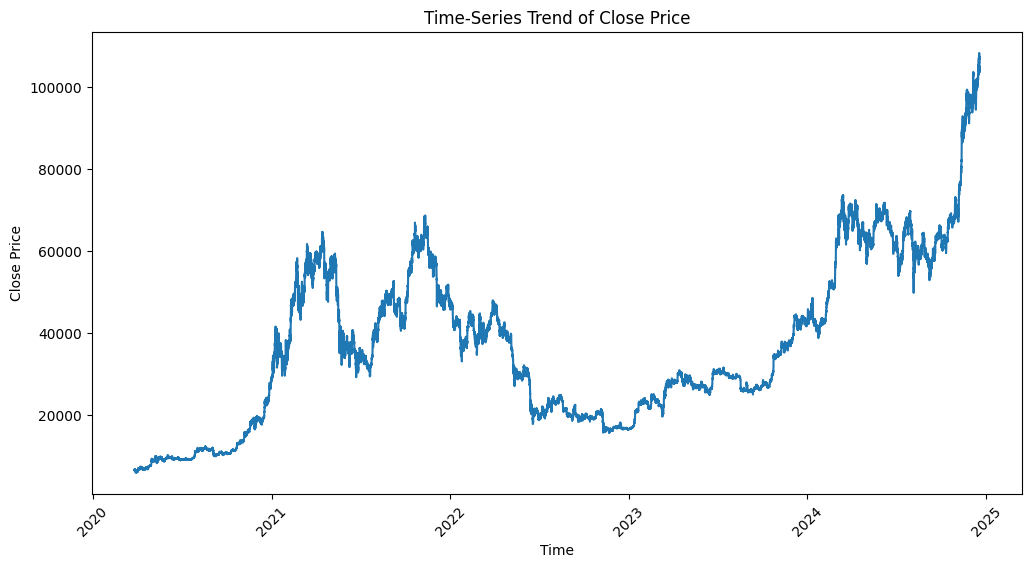

In [5]:
# Step 4.1: Plot close_price over time
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['close_price'])
plt.title('Time-Series Trend of Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()


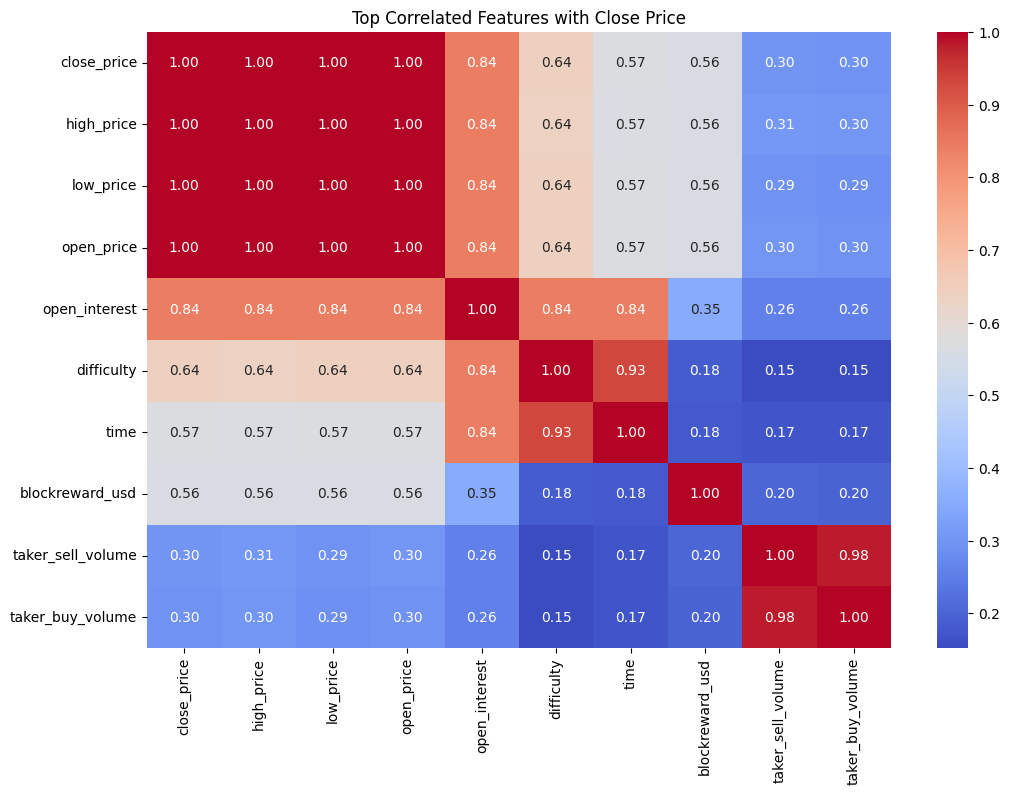

In [6]:
#  Correlation Analysis
correlation_matrix = df.corr()

# Top features correlated with close_price
top_features = correlation_matrix['close_price'].sort_values(ascending=False).head(10).index

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top Correlated Features with Close Price')
plt.show()


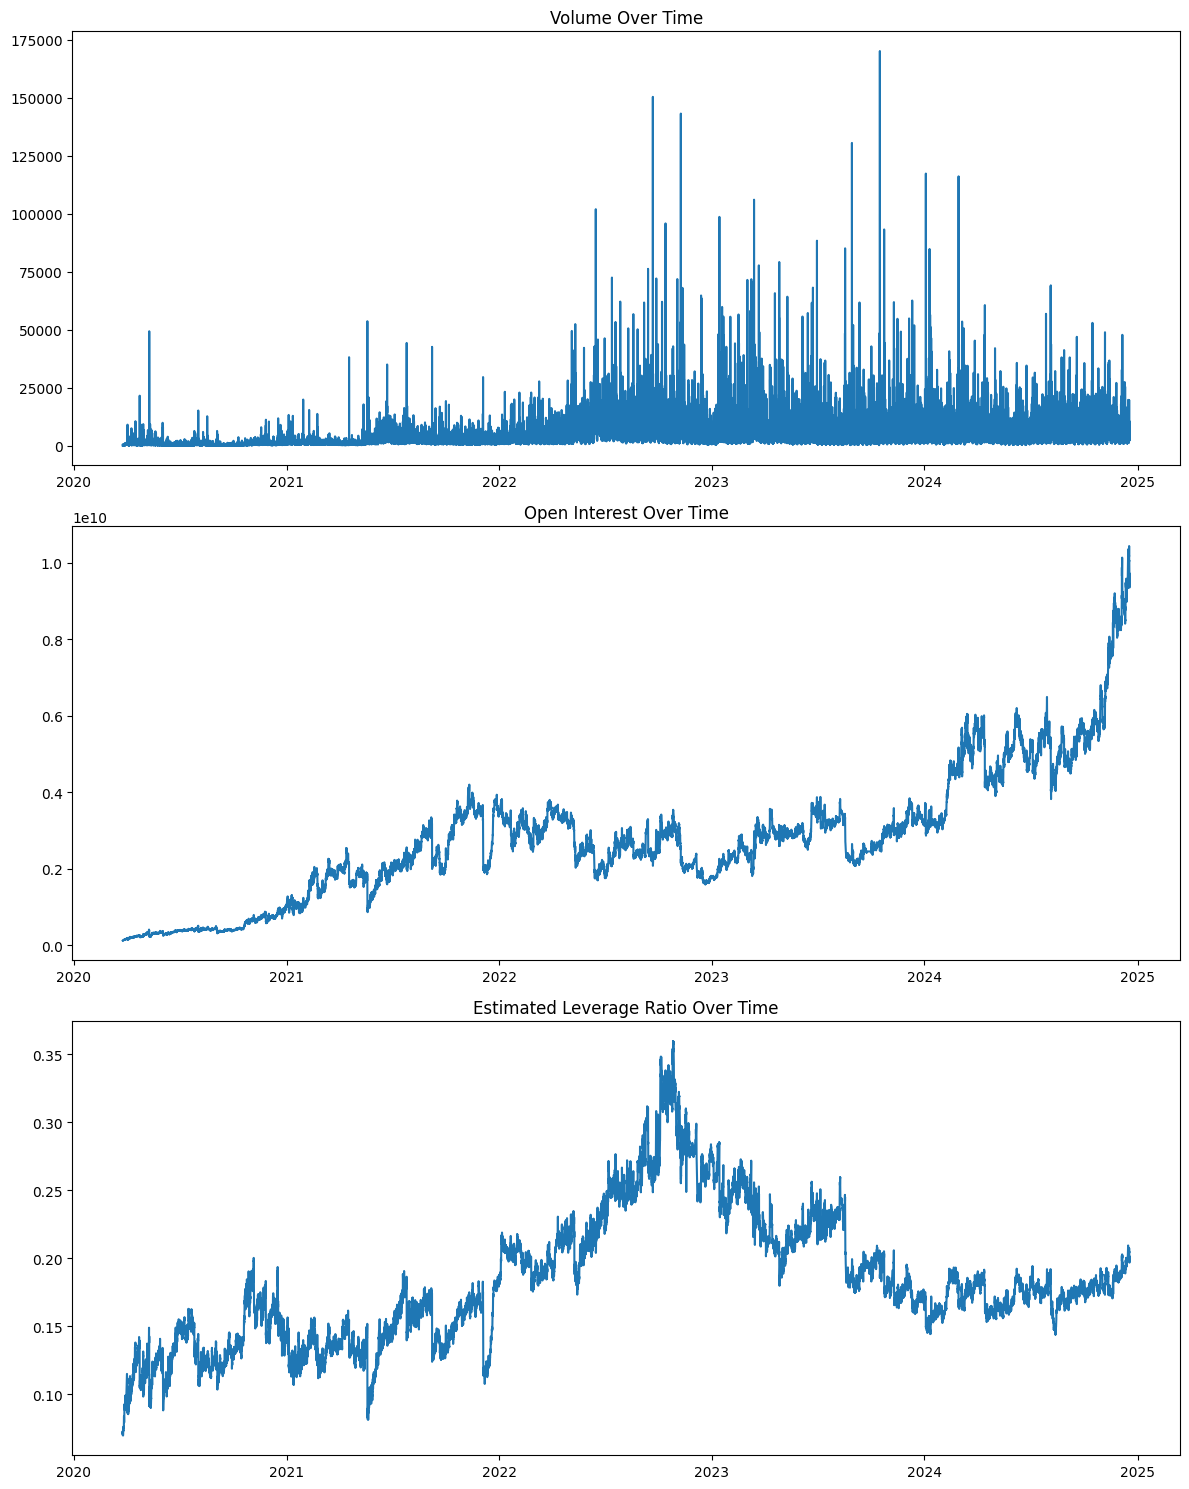

In [7]:
# Step 4.3: Plot key factors over time
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Volume
axs[0].plot(df['time'], df['volume'])
axs[0].set_title('Volume Over Time')

# Open Interest
axs[1].plot(df['time'], df['open_interest'])
axs[1].set_title('Open Interest Over Time')

# Estimated Leverage Ratio
axs[2].plot(df['time'], df['estimated_leverage_ratio'])
axs[2].set_title('Estimated Leverage Ratio Over Time')

plt.tight_layout()
plt.show()


## Feature Engineering

In [8]:
# Apply transformations
df['log_close_price'] = np.log(df['close_price'])
df['sqrt_close_price'] = np.sqrt(df['close_price'])
df['square_close_price'] = np.square(df['close_price'])

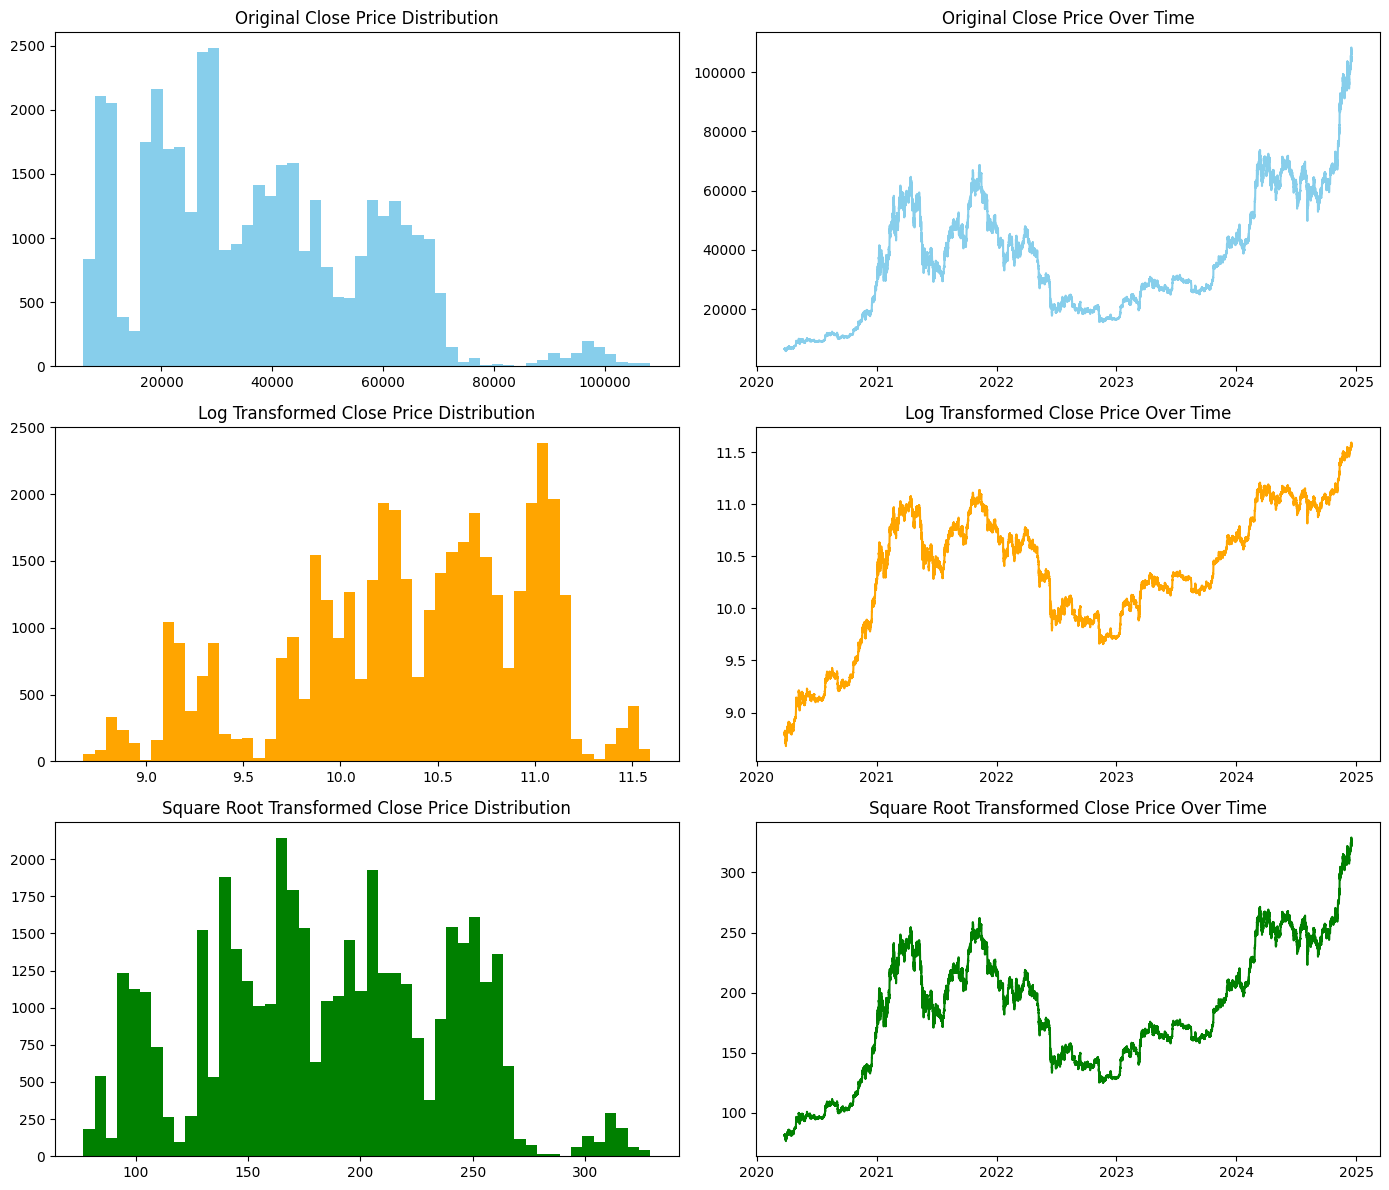

In [50]:
import matplotlib.pyplot as plt

# Set up the figure
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Original Distribution
axs[0, 0].hist(df['close_price'], bins=50, color='skyblue')
axs[0, 0].set_title('Original Close Price Distribution')
axs[0, 1].plot(df['time'], df['close_price'], label='Original', color='skyblue')
axs[0, 1].set_title('Original Close Price Over Time')

# Log Transformation
axs[1, 0].hist(df['log_close_price'], bins=50, color='orange')
axs[1, 0].set_title('Log Transformed Close Price Distribution')
axs[1, 1].plot(df['time'], df['log_close_price'], label='Log Transformed', color='orange')
axs[1, 1].set_title('Log Transformed Close Price Over Time')

# Square Root Transformation
axs[2, 0].hist(df['sqrt_close_price'], bins=50, color='green')
axs[2, 0].set_title('Square Root Transformed Close Price Distribution')
axs[2, 1].plot(df['time'], df['sqrt_close_price'], label='Square Root Transformed', color='green')
axs[2, 1].set_title('Square Root Transformed Close Price Over Time')

# Adjust layout
plt.tight_layout()
plt.show()


In [9]:
# Create lag features for close_price
df['close_price_lag1'] = df['close_price'].shift(1)
df['close_price_lag2'] = df['close_price'].shift(2)

## Model Development

In [10]:
#  Feature Selection
features = ['open_price', 'high_price', 'low_price', 'volume', 'open_interest']
X = df[features].fillna(0)
y = df['close_price']

### Multi-Linear Regression Model

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
print('R2 Score:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))


R2 Score: 0.9999559110538986
MSE: 18143.243773363567


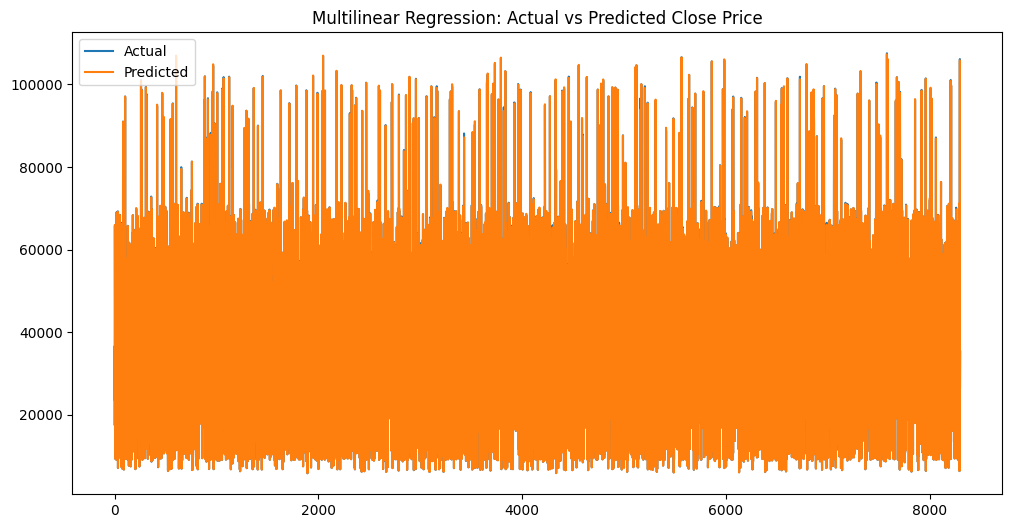

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Multilinear Regression: Actual vs Predicted Close Price')
plt.show()

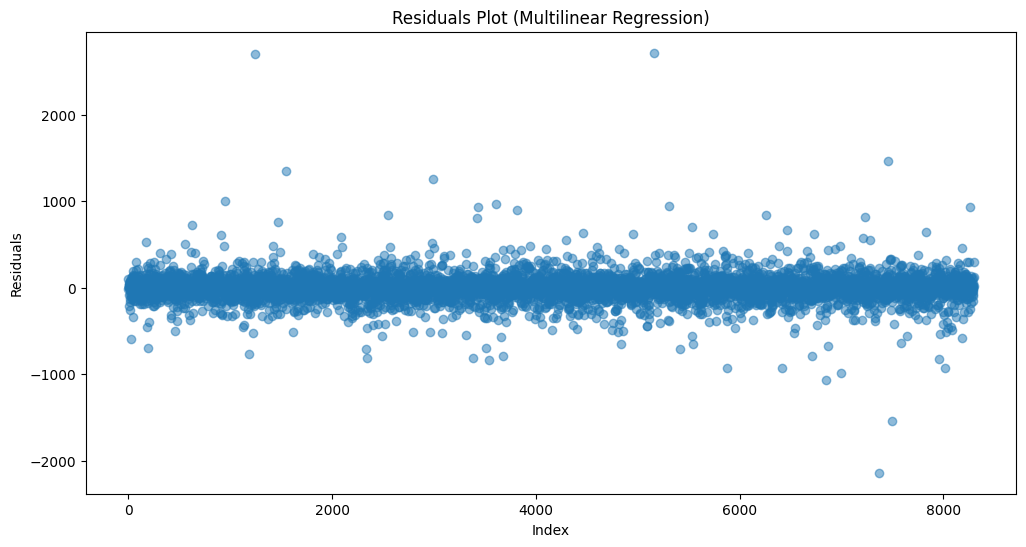

In [58]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.5)
plt.title('Residuals Plot (Multilinear Regression)')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()


In [59]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Average R² Score:", np.mean(cv_scores))


Cross-Validation R² Scores: [0.99995882 0.99995297 0.99996252 0.9999611  0.99996405]
Average R² Score: 0.9999598917717825


In [60]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)


####  Entry-Exit Logic

In [12]:
#  Entry-Exit Logic
df['signal'] = np.where(df['close_price'] > df['close_price'].shift(1), 1, -1)
df['pnl'] = df['signal'].shift(1) * df['close_price'].pct_change()


In [13]:
# Calculate Sharpe Ratio
sharpe_ratio = df['pnl'].mean() / df['pnl'].std() * np.sqrt(365 * 24)

# Calculate Max Drawdown
cumulative_pnl = df['pnl'].cumsum()
running_max = cumulative_pnl.cummax()
max_drawdown = (cumulative_pnl - running_max).min()

# Calculate Trade per Interval
trade_per_interval = df['signal'].diff().abs().sum() / len(df)

# Print Metrics
print('Sharpe Ratio:', sharpe_ratio)
print('Max Drawdown:', max_drawdown)
print('Trade per Interval:', trade_per_interval)


Sharpe Ratio: -0.3200803539040762
Max Drawdown: -1.876070818861911
Trade per Interval: 1.0657381078606198


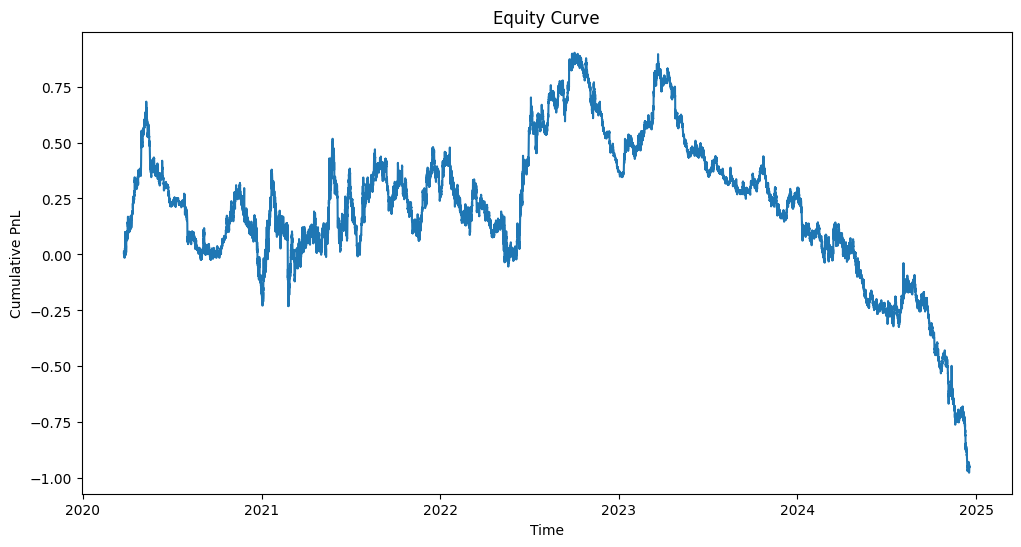

In [14]:
# Plot Equity Curve
df['cumulative_pnl'] = df['pnl'].cumsum()
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['cumulative_pnl'])
plt.title('Equity Curve')
plt.xlabel('Time')
plt.ylabel('Cumulative PnL')
plt.show()


### Rolling Z-Score

In [15]:
# Calculate rolling mean and standard deviation
window = 24  # 24-hour rolling window
df['rolling_mean'] = df['close_price'].rolling(window=window).mean()
df['rolling_std'] = df['close_price'].rolling(window=window).std()

# Calculate Z-Score
df['z_score'] = (df['close_price'] - df['rolling_mean']) / df['rolling_std']


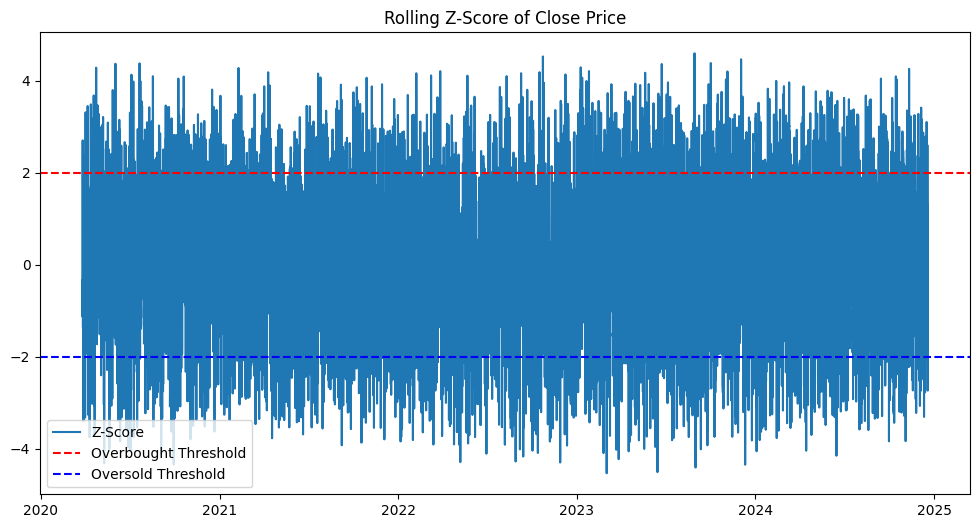

In [16]:
# Plot Z-Score over time
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['z_score'], label='Z-Score')
plt.axhline(2, color='red', linestyle='--', label='Overbought Threshold')
plt.axhline(-2, color='blue', linestyle='--', label='Oversold Threshold')
plt.title('Rolling Z-Score of Close Price')
plt.legend()
plt.show()


```
Trading Signals from Z-Score
Buy Signal: When Z-Score < -2
Sell Signal: When Z-Score > 2
```

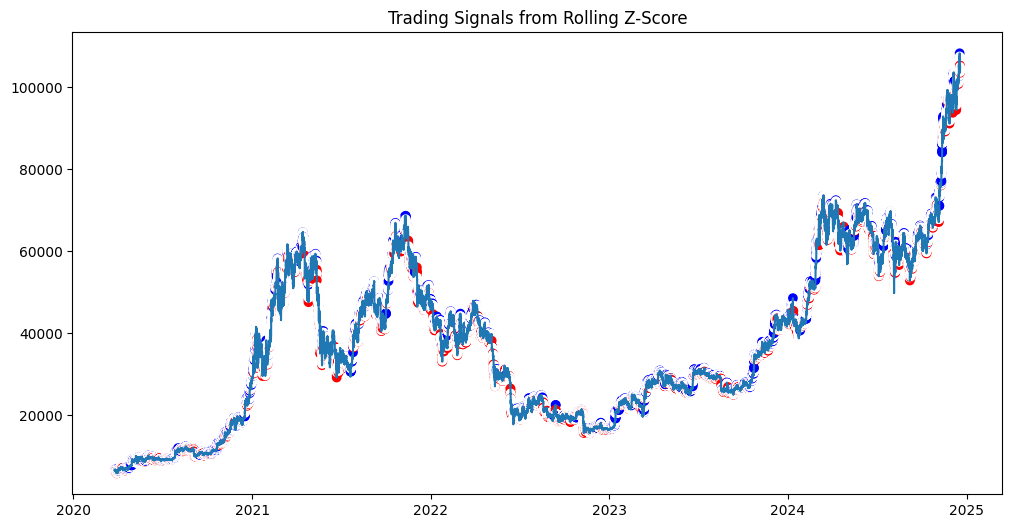

In [17]:
# Define Buy and Sell Signals
df['signal'] = np.where(df['z_score'] < -2, 1, 0)  # Buy signal
df['signal'] = np.where(df['z_score'] > 2, -1, df['signal'])  # Sell signal

# Visualize Signals
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['close_price'], label='Close Price')
plt.scatter(df['time'], df['close_price'], c=df['signal'], cmap='bwr', marker='o')
plt.title('Trading Signals from Rolling Z-Score')
plt.show()

### Explainable Machine Learning Techniques (Random Forest and Decision Tree)

In [18]:
# Feature and target variable selection
features = ['open_price', 'high_price', 'low_price', 'volume', 'open_interest']
X = df[features].fillna(0)
y = df['close_price']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Train Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluate Model
print('R² Score:', r2_score(y_test, y_pred_rf))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_rf))


R² Score: 0.9999404840566898
Mean Squared Error: 24491.677922981442


In [20]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='r2')

# Display Cross-Validation Scores
print("Cross-Validation R² Scores:", cv_scores)
print("Average R² Score:", np.mean(cv_scores))


Cross-Validation R² Scores: [0.99994409 0.99994369 0.99994824 0.99994763 0.99995325]
Average R² Score: 0.9999473805813279


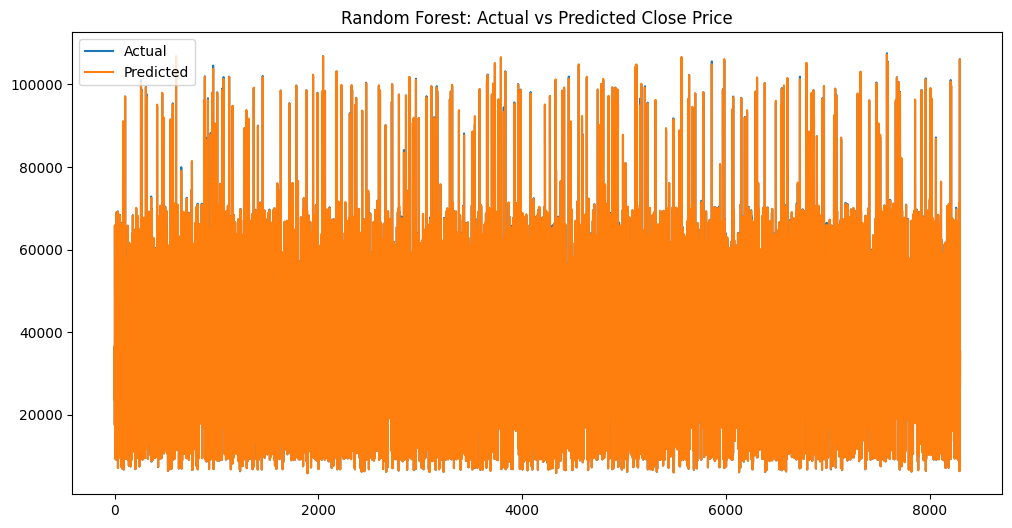

In [21]:
# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_rf, label='Predicted')
plt.legend()
plt.title('Random Forest: Actual vs Predicted Close Price')
plt.show()


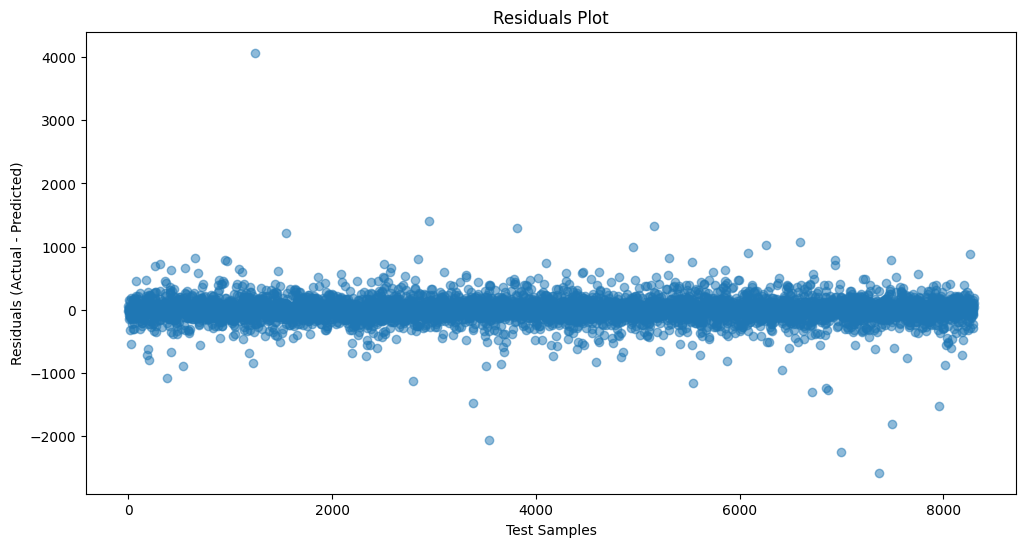

In [64]:
# Calculate Residuals
residuals = y_test - y_pred_rf

# Plot Residuals
plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.5)
plt.title('Residuals Plot')
plt.xlabel('Test Samples')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters
best_params = grid_search.best_params_
print("Best Hyperparameters Found:")
print(best_params)

# Train Random Forest with best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predictions
y_pred_rf_best = best_rf.predict(X_test)

# Evaluate model performance
from sklearn.metrics import r2_score, mean_squared_error
r2_best = r2_score(y_test, y_pred_rf_best)
mse_best = mean_squared_error(y_test, y_pred_rf_best)

print("Optimized Random Forest Performance:")
print(f"R² Score: {r2_best}")
print(f"Mean Squared Error: {mse_best}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters Found:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Performance:
R² Score: 0.9999413837302517
Mean Squared Error: 24121.449142470883


100%|===================| 8289/8300 [06:34<00:00]        

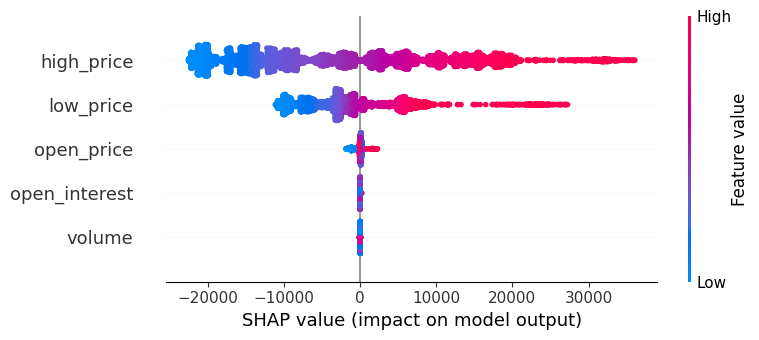

In [62]:
import shap

# Initialize SHAP Explainer
explainer = shap.Explainer(best_rf, X_test)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)


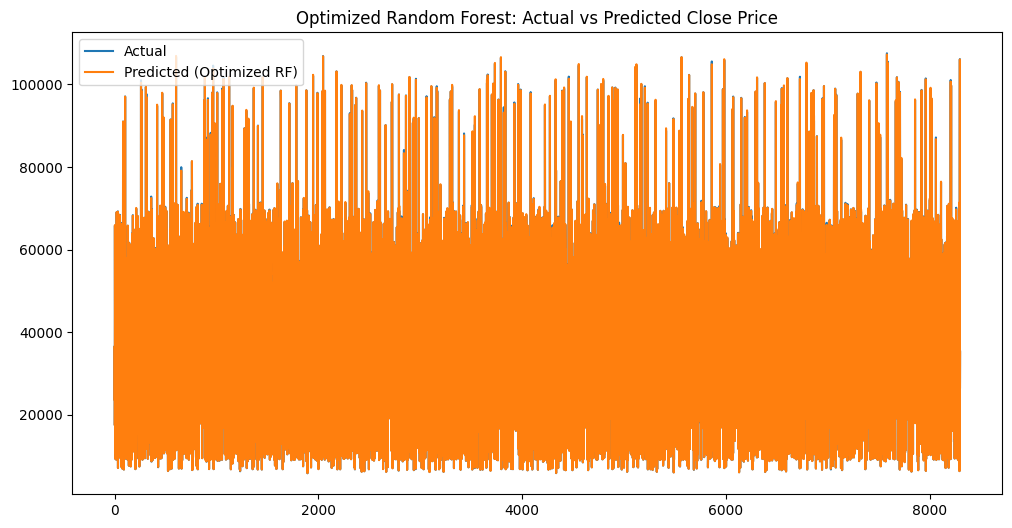

In [63]:
# Plot Actual vs Predicted (Optimized Model)
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_rf_best, label='Predicted (Optimized RF)')
plt.legend()
plt.title('Optimized Random Forest: Actual vs Predicted Close Price')
plt.show()

In [23]:
pip install lime

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.8 MB 4.8 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/12.8 MB 7.9 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/12.8 MB 6.2 MB/s eta 0:00:02
   --------------- ------------------------ 5.0/12.8 MB 6.6 MB/s eta 0:00:02
   ------------------- -------------------- 6.3/12.8 MB 6.5 MB/s eta 0:00:01
   ----------------------- ---------------- 7.6/12.8 MB 6.5 MB/s eta 0:00:01
   ------------------------- -------------- 8.1/12.8 MB 5.9 MB/s eta 0:00:01
   --------------------------- ------------ 8.7/12.8 MB 5.7 MB/s eta 0:00:01
   ----------------------------- ---------- 9.4/12.8 MB 5.3 MB/s eta 0:00:01
   ------------------------------- -------- 10.0/12.8 MB 5.0 MB/s eta 0:00:01
   -------------------------------- ------- 10.5/12.8 MB 

In [65]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME Explainer
explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=X.columns,
    class_names=['close_price'],
    mode='regression'
)

# Explain a single prediction
exp = explainer.explain_instance(X_test.iloc[0].values, model_rf.predict)
exp.show_in_notebook()



C:\Users\MD Raffaul Islam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Decision Tree for Price Prediction

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# Initialize and train Decision Tree Regressor
model_dt = DecisionTreeRegressor(max_depth=4, random_state=42)
model_dt.fit(X_train, y_train)

# Predictions
y_pred_dt = model_dt.predict(X_test)

# Evaluate Model
print('R² Score:', r2_score(y_test, y_pred_dt))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_dt))


R² Score: 0.9949524129139485
Mean Squared Error: 2077155.6380353146


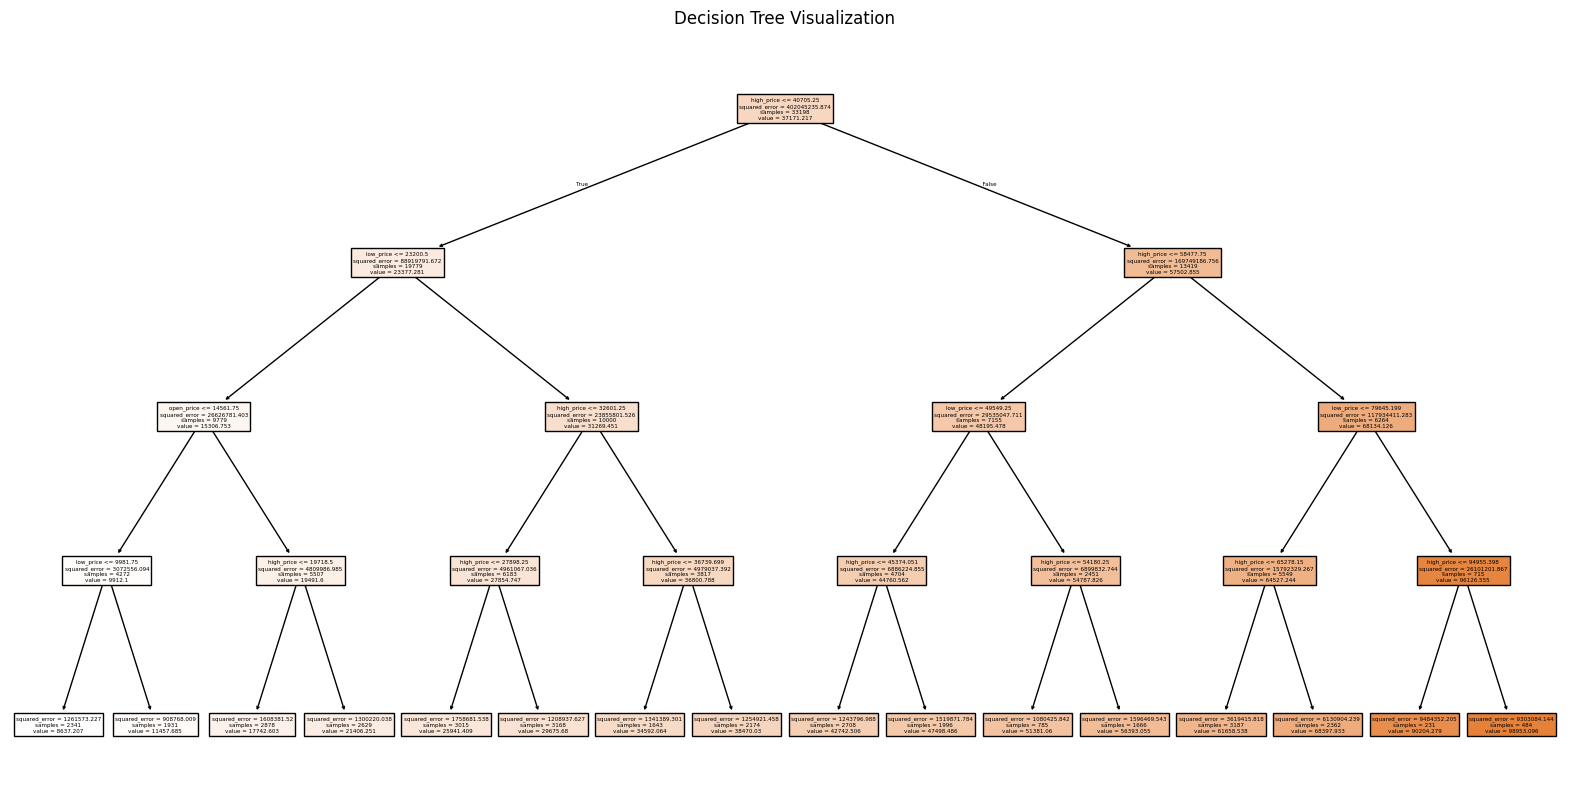

In [26]:
plt.figure(figsize=(20, 10))
plot_tree(model_dt, feature_names=X.columns, filled=True)
plt.title('Decision Tree Visualization')
plt.show()


In [28]:
# Calculate Profit and Loss (PnL)
df['pnl'] = df['signal'].shift(1) * df['close_price'].pct_change()

# Sharpe Ratio
sharpe_ratio = df['pnl'].mean() / df['pnl'].std() * np.sqrt(365 * 24)

# Max Drawdown
cumulative_pnl = df['pnl'].cumsum()
running_max = cumulative_pnl.cummax()
max_drawdown = (cumulative_pnl - running_max).min()

# Trade per Interval
trade_per_interval = df['signal'].diff().abs().sum() / len(df)

# Display Metrics
print('Sharpe Ratio:', sharpe_ratio)
print('Max Drawdown:', max_drawdown)
print('Trade per Interval:', trade_per_interval)


Sharpe Ratio: -0.8449014914131046
Max Drawdown: -1.2663981594917546
Trade per Interval: 0.10699310810159526


In [29]:
# Example Buy/Sell signal logic based on predictions
df['predicted_close'] = model_rf.predict(X)
df['signal'] = np.where(df['predicted_close'] > df['close_price'].shift(1), 1, -1)

# Evaluate signals
df['pnl'] = df['signal'].shift(1) * df['close_price'].pct_change()


### Best Model Random Forest Evaluation

In [66]:
# Define features and target variable
features = ['open_price', 'high_price', 'low_price', 'volume', 'open_interest']
X = df[features].fillna(0)
y = df['close_price']

# Train-test split (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
#Train Random Forest with Hyperparameter Tuning

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the best model
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make Predictions
y_pred_rf = best_rf.predict(X_test)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [68]:
from sklearn.metrics import r2_score, mean_squared_error

# Evaluate model performance
r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: 0.9999360648707465
Mean Squared Error: 26310.23733386597


### Generate Trading Signals

In [33]:
# Generate trading signals
df['predicted_close'] = best_rf.predict(X)
df['signal'] = np.where(df['predicted_close'] > df['close_price'].shift(1), 1, -1)

# Calculate PnL
df['pnl'] = df['signal'].shift(1) * df['close_price'].pct_change()


In [34]:
# Sharpe Ratio
sharpe_ratio = df['pnl'].mean() / df['pnl'].std() * np.sqrt(365 * 24)

# Max Drawdown
cumulative_pnl = df['pnl'].cumsum()
running_max = cumulative_pnl.cummax()
max_drawdown = (cumulative_pnl - running_max).min()

# Trade per Interval
trade_per_interval = df['signal'].diff().abs().sum() / len(df)

# Print Metrics
print('Sharpe Ratio:', sharpe_ratio)
print('Max Drawdown:', max_drawdown)
print('Trade per Interval:', trade_per_interval)


Sharpe Ratio: 1.0214995888612604
Max Drawdown: -0.7878166206142843
Trade per Interval: 0.9795652802544701


### Plot Equity Curve

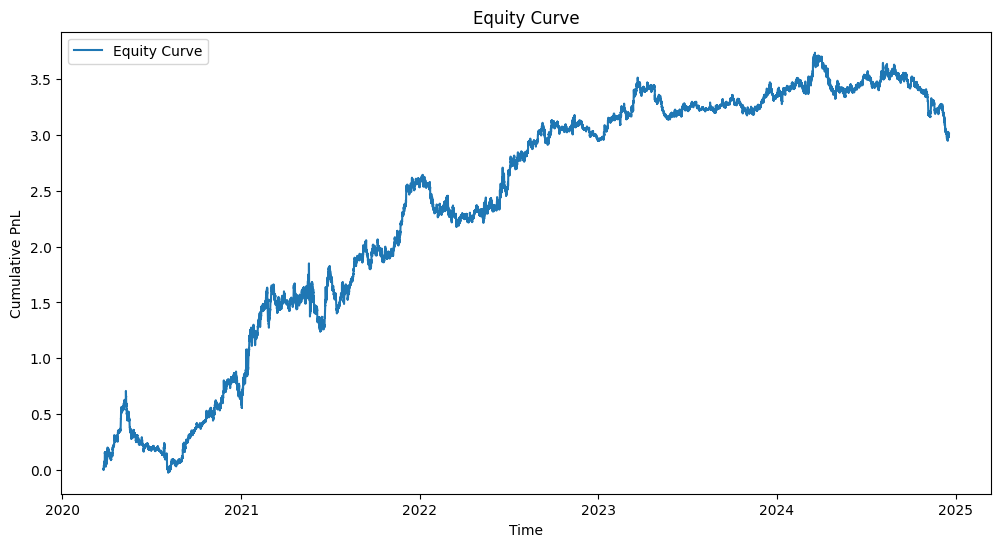

In [35]:
# Calculate Cumulative PnL
df['cumulative_pnl'] = df['pnl'].cumsum()

# Plot Equity Curve
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['cumulative_pnl'], label='Equity Curve')
plt.title('Equity Curve')
plt.xlabel('Time')
plt.ylabel('Cumulative PnL')
plt.legend()
plt.show()


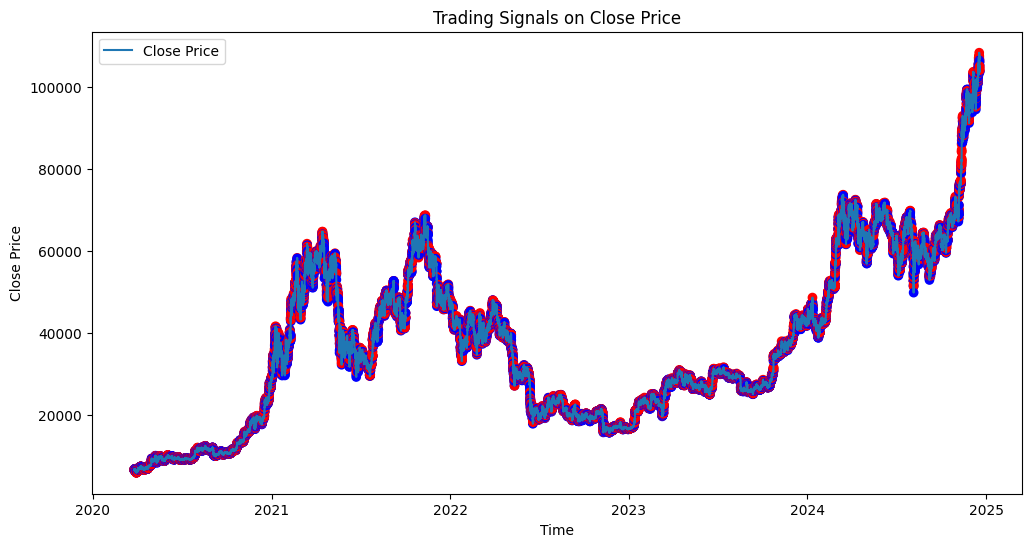

In [36]:
# Plot trading signals
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['close_price'], label='Close Price')
plt.scatter(df['time'], df['close_price'], c=df['signal'], cmap='bwr', marker='o')
plt.title('Trading Signals on Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


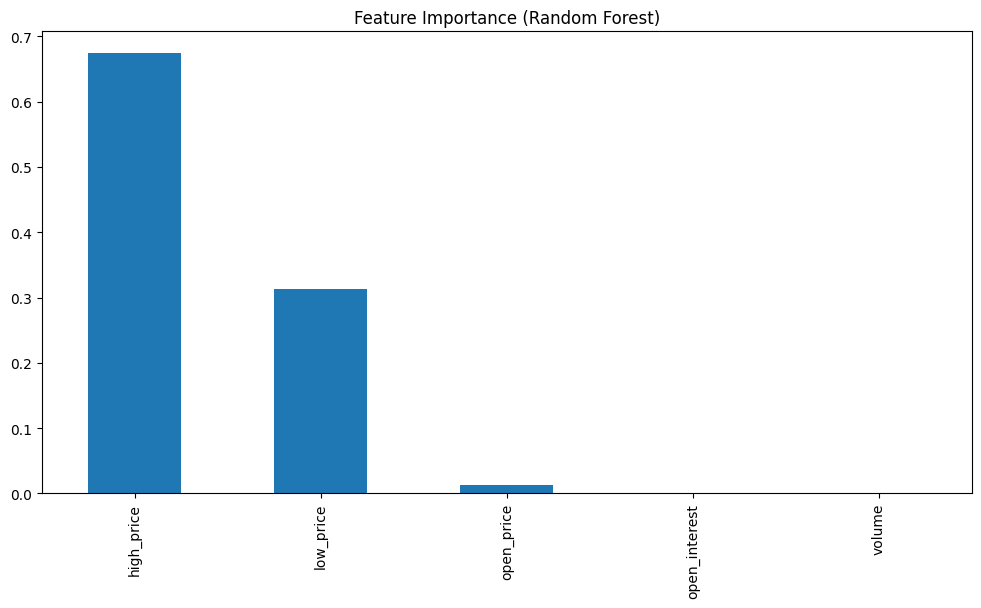

In [47]:
# Feature Importance Plot
importances = model_rf.feature_importances_
features_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
features_importance.plot(kind='bar')
plt.title('Feature Importance (Random Forest)')
plt.show()

##  Forward Testing

In [39]:
# Forward Testing (Use recent unseen data)
forward_df = df.tail(100).copy()

# Generate predictions for forward data
forward_df['predicted_close'] = model_rf.predict(forward_df[features])

# Trading Signals
forward_df['signal'] = np.where(forward_df['predicted_close'] > forward_df['close_price'].shift(1), 1, -1)
forward_df['pnl'] = forward_df['signal'].shift(1) * forward_df['close_price'].pct_change()

# Performance Metrics for Forward Testing
sharpe_ratio_forward = forward_df['pnl'].mean() / forward_df['pnl'].std() * np.sqrt(365 * 24)
max_drawdown_forward = (forward_df['pnl'].cumsum() - forward_df['pnl'].cumsum().cummax()).min()
trade_per_interval_forward = forward_df['signal'].diff().abs().sum() / len(forward_df)

# Display Metrics
print('Forward Test Sharpe Ratio:', sharpe_ratio_forward)
print('Forward Test Max Drawdown:', max_drawdown_forward)
print('Forward Test Trade per Interval:', trade_per_interval_forward)


Forward Test Sharpe Ratio: 2.191352220942273
Forward Test Max Drawdown: -0.038957525131680715
Forward Test Trade per Interval: 1.06


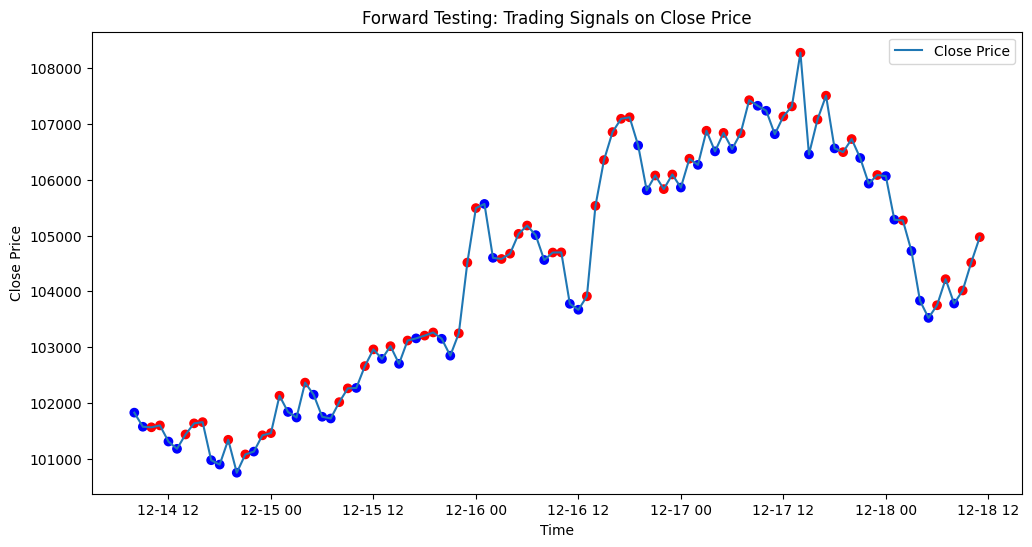

In [40]:
# Plot Trading Signals on Forward Test Data
plt.figure(figsize=(12, 6))
plt.plot(forward_df['time'], forward_df['close_price'], label='Close Price')
plt.scatter(forward_df['time'], forward_df['close_price'], c=forward_df['signal'], cmap='bwr', marker='o')
plt.title('Forward Testing: Trading Signals on Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [41]:
# Display Best Parameters from GridSearchCV
print("Best Parameters Found via GridSearchCV:")
print(best_rf.get_params())


Best Parameters Found via GridSearchCV:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [42]:
# Include trading fees
trading_fee = 0.0002  # 0.02%

# Adjust PnL for fees
forward_df['pnl_after_fees'] = forward_df['pnl'] - trading_fee

# Sharpe Ratio
sharpe_ratio = forward_df['pnl_after_fees'].mean() / forward_df['pnl_after_fees'].std() * np.sqrt(365 * 24)

# Max Drawdown
cumulative_pnl = forward_df['pnl_after_fees'].cumsum()
running_max = cumulative_pnl.cummax()
max_drawdown = (cumulative_pnl - running_max).min()

# Trade per Interval
trade_per_interval = forward_df['signal'].diff().abs().sum() / len(forward_df)

# Display Performance Metrics
print("Performance Metrics:")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Max Drawdown: {max_drawdown:.4f}")
print(f"Trade per Interval: {trade_per_interval:.4f}")
print(f"Fees per Trade: {trading_fee}")


Performance Metrics:
Sharpe Ratio: -1.7970
Max Drawdown: -0.0440
Trade per Interval: 1.0600
Fees per Trade: 0.0002


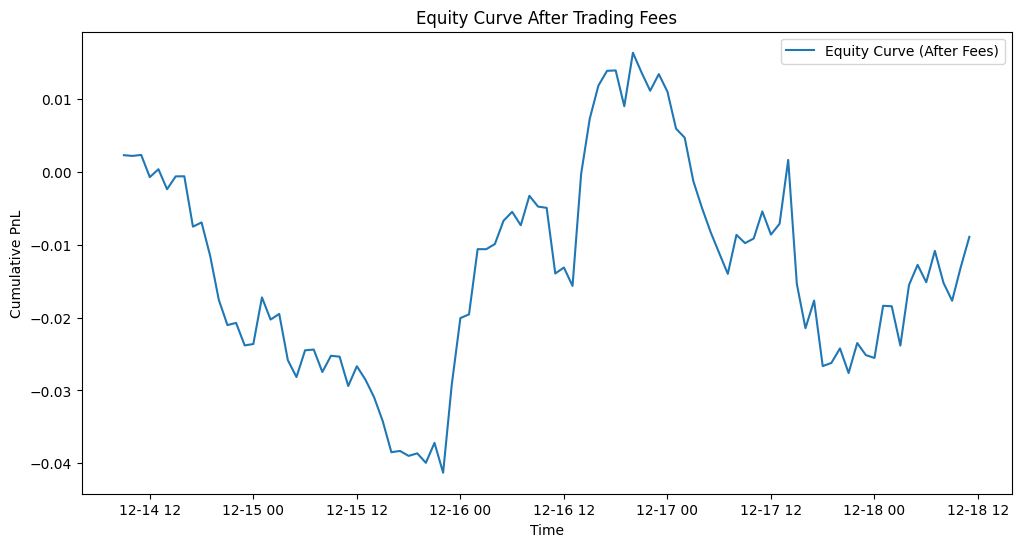

In [43]:
# Calculate cumulative PnL after fees
forward_df['cumulative_pnl_after_fees'] = forward_df['pnl_after_fees'].cumsum()

# Plot Equity Curve
plt.figure(figsize=(12, 6))
plt.plot(forward_df['time'], forward_df['cumulative_pnl_after_fees'], label='Equity Curve (After Fees)')
plt.title('Equity Curve After Trading Fees')
plt.xlabel('Time')
plt.ylabel('Cumulative PnL')
plt.legend()
plt.show()


### Visualize Trading Signals

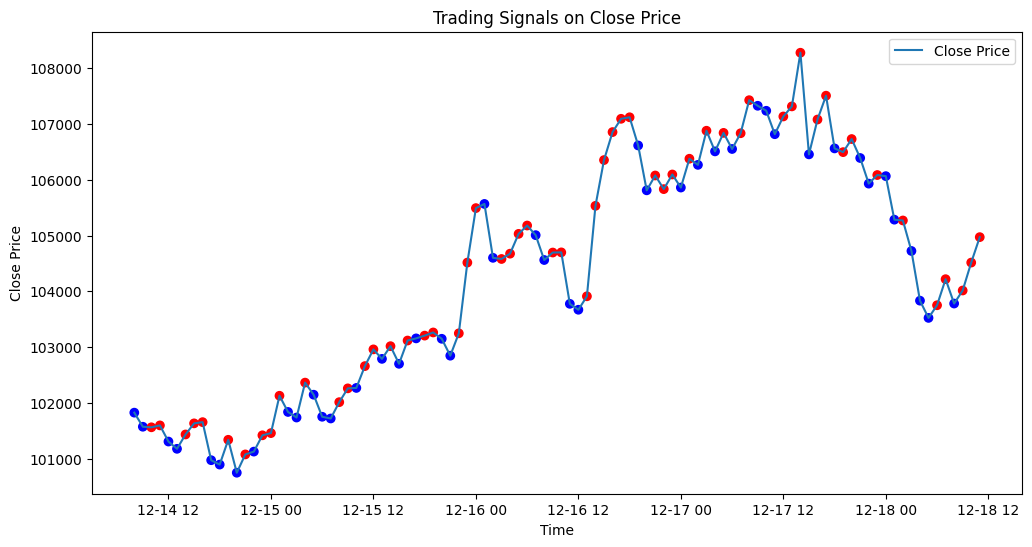

In [44]:
# Plot Trading Signals on Close Price
plt.figure(figsize=(12, 6))
plt.plot(forward_df['time'], forward_df['close_price'], label='Close Price')
plt.scatter(forward_df['time'], forward_df['close_price'], c=forward_df['signal'], cmap='bwr', marker='o')
plt.title('Trading Signals on Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


## Final Performance Summary

In [46]:
# Create a summary table
performance_summary = {
    'Sharpe Ratio': sharpe_ratio,
    'Max Drawdown': max_drawdown,
    'Trade per Interval': trade_per_interval,
    'Fees per Trade': trading_fee
}

import pandas as pd
performance_df = pd.DataFrame.from_dict(performance_summary, orient='index', columns=['Value'])
print(performance_df)


                       Value
Sharpe Ratio       -1.796986
Max Drawdown       -0.043958
Trade per Interval  1.060000
Fees per Trade      0.000200
